In [2]:
import json
import pydot
import requests
import graphviz
import math
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import time

from pprint import pprint
from math import ceil
from pandas import DataFrame
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.inspection import permutation_importance

In [3]:
# read csv
data = pd.read_csv('DataTableToRegress.csv')
featnames = ['C', 'Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb','Zr']
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
# featnames = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']
# data.describe

In [4]:
#set up test data
X = data[featnames]  # Features

ylin = data['Tot Vol Frac Other']
ylog = data['Acceptable']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize the linear regression model
linreg = LinearRegression()

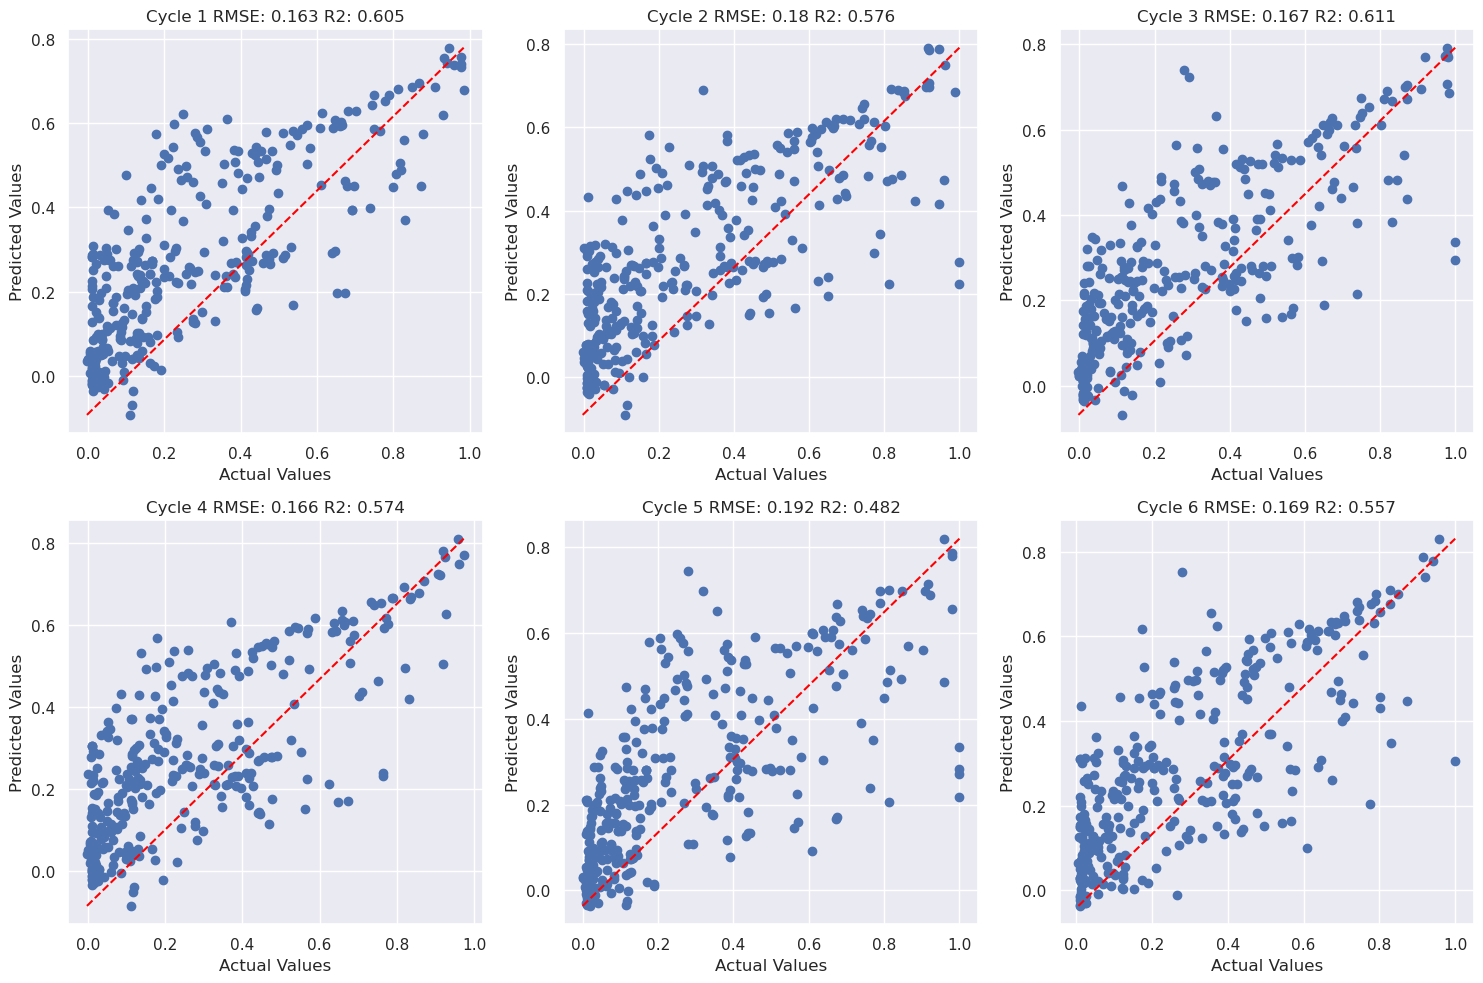

In [6]:
#running multiple linear regression across the randomized data to see how consistent the prediction is

# Set the number of cycles through all data for testing
num_cycles = 6  # Adjust this number as needed

# Calculate the optimal number of rows and columns for the subplots
num_plots = num_cycles
rows = int(np.sqrt(num_plots))
cols = int(np.ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Loop for multiple linear regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylin, test_size=0.2, random_state=cycle)

    # Fit the model using the training data
    linreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test)

    # Calculate and print Root Mean Squared Error
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
#     print(f"RMSE for Cycle {cycle + 1}: {rmse}")

    # Calculate R-squared
    r_squared = round(r2_score(y_test, y_pred), 3)
#     print(f"R-squared for Cycle {cycle + 1}: {r_squared}")

    # Scatter Plot with Regression Line
    ax = axs[int(cycle / cols), cycle % cols]
    ax.scatter(y_test, y_pred)
    ax.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Cycle {cycle + 1} RMSE: {rmse} R2: {r_squared}')

# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()


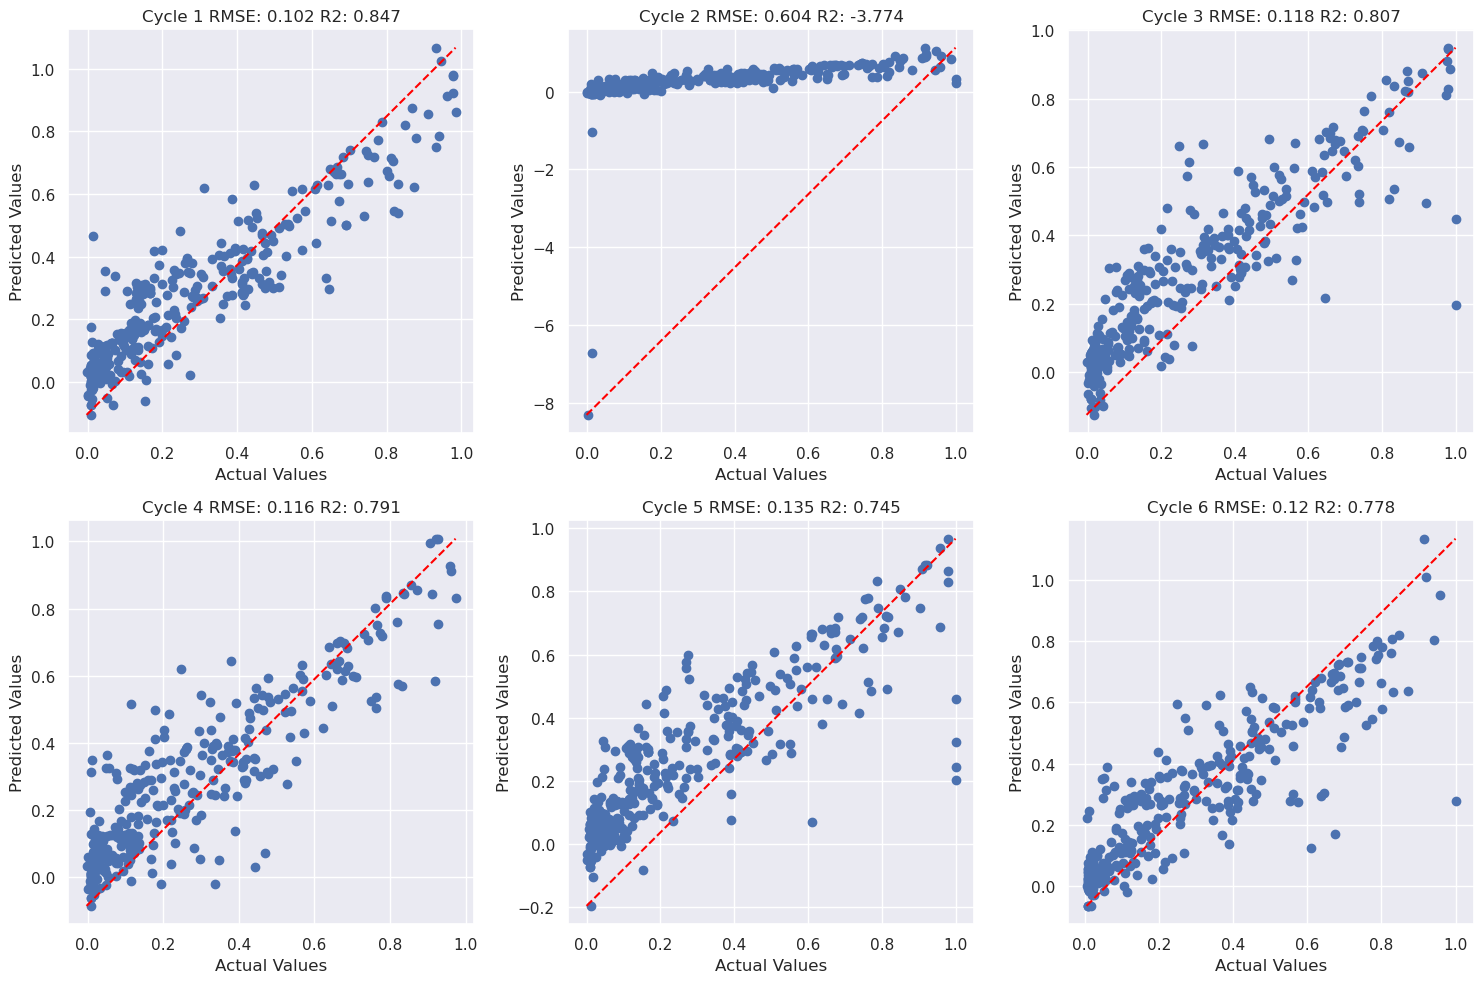

In [7]:
#polynomial regression
# Set the degree of the polynomial
degree = 2  # Adjust this degree as needed

# Set the number of cycles through all data for testing
num_cycles = 6  # Adjust this number as needed

# Calculate the optimal number of rows and columns for the subplots
num_plots = num_cycles
rows = int(np.sqrt(num_plots))
cols = int(np.ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Loop for multiple polynomial regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylin, test_size=0.2, random_state=cycle)
    
    # Transform the features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Initialize and fit the model using the training data
    linreg = LinearRegression()
    linreg.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred = linreg.predict(X_test_poly)

    # Calculate and print Root Mean Squared Error
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
    
    # Calculate R-squared
    r_squared = round(r2_score(y_test, y_pred), 3)
#     print(f"R-squared for Cycle {cycle + 1}: {r_squared}")

    # Scatter Plot with Regression Line
    ax = axs[int(cycle / cols), cycle % cols]
    ax.scatter(y_test, y_pred)
    ax.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'Cycle {cycle + 1} RMSE: {rmse} R2: {r_squared}')

# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()


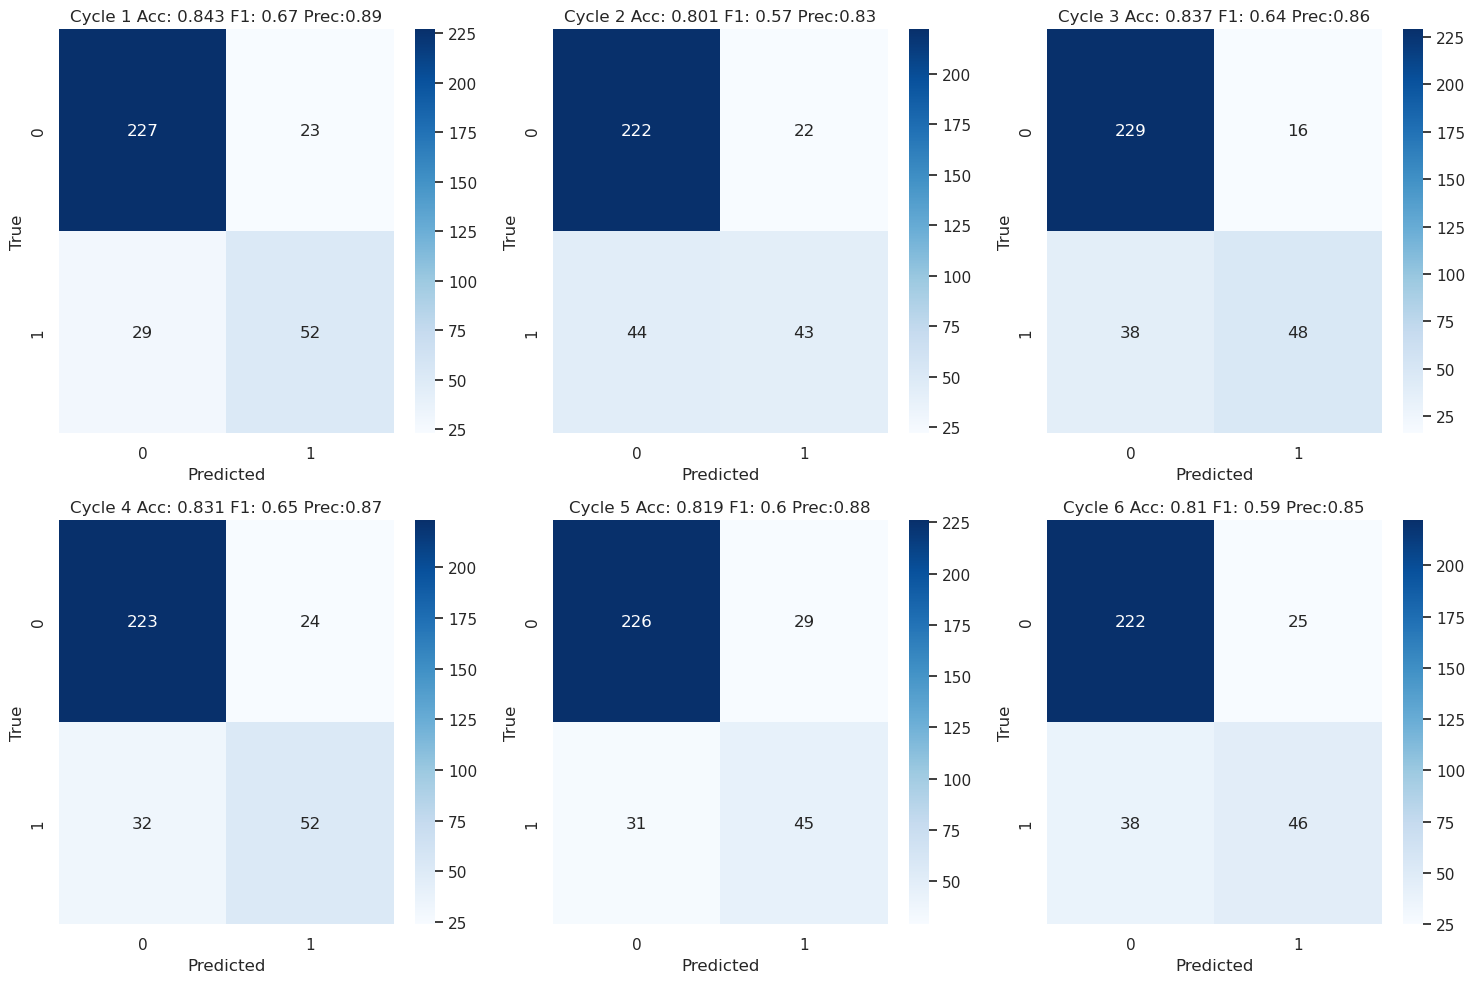

In [10]:
#running multiple logistic regression across the randomized data to see how consistent the prediction is


# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Set the number of cycles through all data for testing
num_cycles = 6  # Adjust this number as needed

# Calculate the optimal number of rows and columns for the subplots
num_plots = num_cycles
rows = int(np.sqrt(num_plots))
cols = int(np.ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Loop for multiple linear regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylog, test_size=0.2, random_state=cycle)

    # Fit the model using the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    accuracy = round(accuracy_score(y_test, y_pred),3)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1_score = float(report.split('\n')[3].split()[3])
    precision = float(report.split('\n')[2].split()[1])    
    
    # Display confusion matrix
    ax = axs[int(cycle / cols), cycle % cols]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Cycle {cycle + 1} Acc: {accuracy} F1: {f1_score} Prec:{precision}')


# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()


In [8]:
#forest regression
# Record the start time
start_time = time.time()

#split data
y = data['Tot Vol Frac Other']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators= 100 #200, 209, 600
depth_max = 10

## initialize model
rf_clf = RandomForestRegressor(n_estimators=n_estimators, max_depth=depth_max, random_state=42) #random_state=42
rf_clf.fit(X_train,y_train)

#predictions 
y_pred = rf_clf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

ev = explained_variance_score(y_test, y_pred)
print(f'EV Score: {ev}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {round(rmse, 3)}')

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f'The code took {elapsed_time:.2f} seconds to run.')

R2 Score: 0.8656896315074382
EV Score: 0.865865899174485
RMSE: 0.103
The code took 0.72 seconds to run.


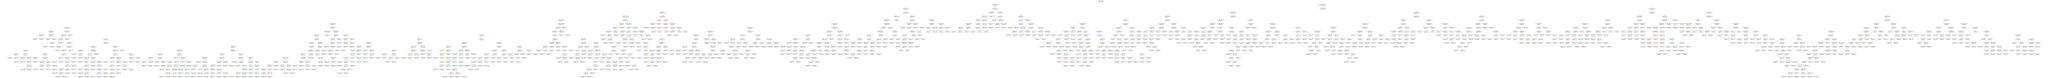

In [102]:
# Plot a decision tree
index = 5
tree = rf_clf.estimators_[index]
from IPython.display import display
columns = list(X_train.columns)
display(graphviz.Source(export_graphviz(tree, feature_names=featnames, class_names=True, out_file=None)))

# Save image to png file
export_graphviz(tree, out_file = 'tree.dot', feature_names = featnames, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree20.png')

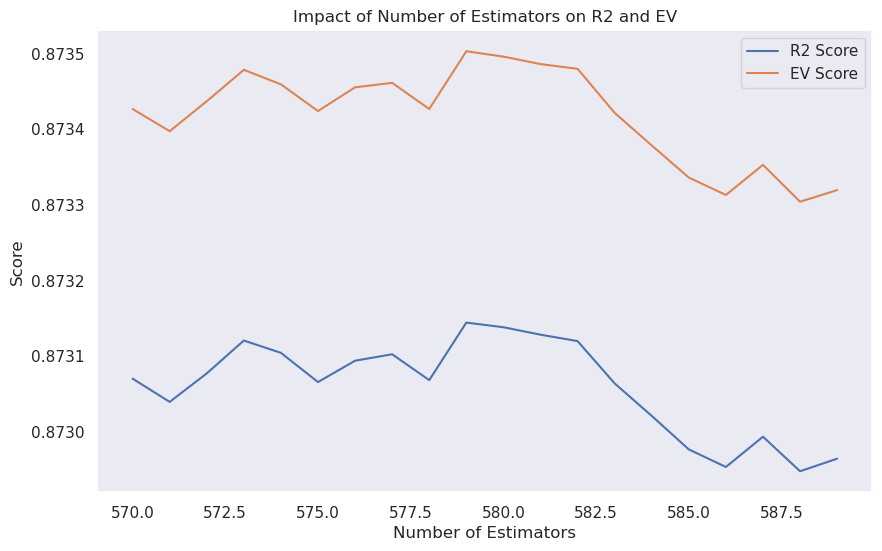

In [7]:

# Initialize lists to store R2 scores and EV scores
r2_scores = []
ev_scores = []

# Vary the number of estimators
n_estimators_values = range(570, 590,1)

for n_estimators in n_estimators_values:
    # Initialize the model with the current number of estimators
    rf_clf = RandomForestRegressor(n_estimators=n_estimators, max_depth=26, random_state=42)
    rf_clf.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = rf_clf.predict(X_test)
    
    # Calculate R2 score and EV score
    r2 = r2_score(y_test, y_pred)
    ev = explained_variance_score(y_test, y_pred)
    
    # Append scores to the lists
    r2_scores.append(r2)
    ev_scores.append(ev)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, r2_scores, label='R2 Score')
plt.plot(n_estimators_values, ev_scores, label='EV Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Impact of Number of Estimators on R2 and EV')
plt.legend()
plt.grid()
plt.show()


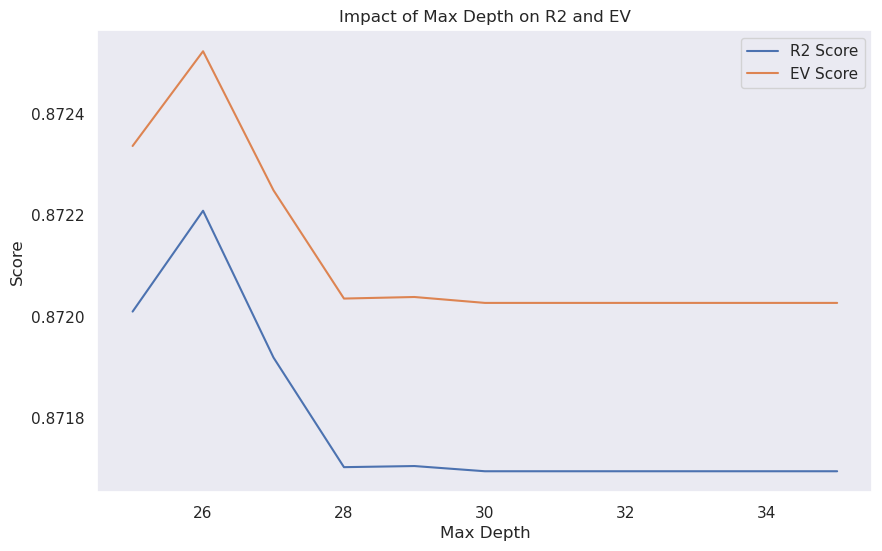

In [109]:

# Initialize lists to store R2 scores and EV scores
r2d_scores = []
evd_scores = []

# Vary the max depth
n_estimators_values = 200
max_depth_values = range(25,36,1)

for max_depth in max_depth_values:
    # Initialize the model with the current max depth
    rf_clf = RandomForestRegressor(n_estimators=200, max_depth=max_depth, random_state=42)
    rf_clf.fit(X_train, y_train)
    
    # Predict using the model
    y_pred = rf_clf.predict(X_test)
    
    # Calculate R2 score and EV score
    r2d = r2_score(y_test, y_pred)
    evd = explained_variance_score(y_test, y_pred)
    
    # Append scores to the lists
    r2d_scores.append(r2d)
    evd_scores.append(evd)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2d_scores, label='R2 Score')
plt.plot(max_depth_values, evd_scores, label='EV Score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Impact of Max Depth on R2 and EV')
plt.legend()
plt.grid()
plt.show()


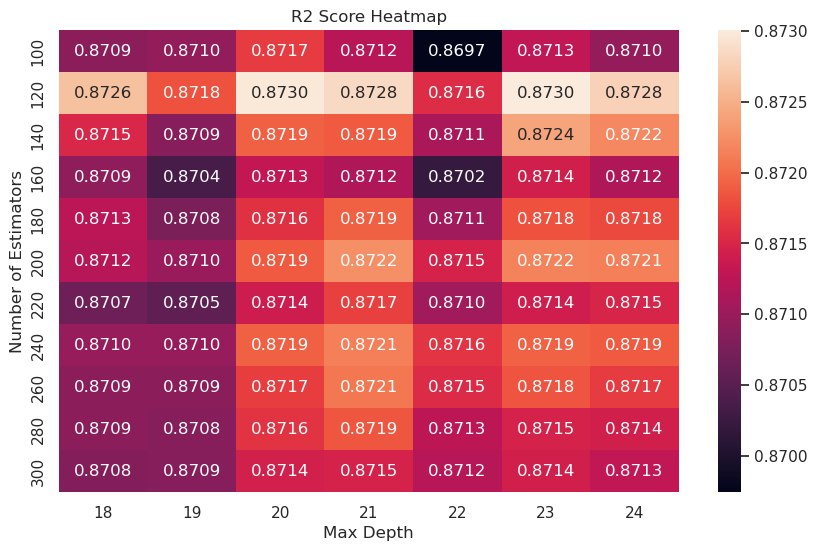

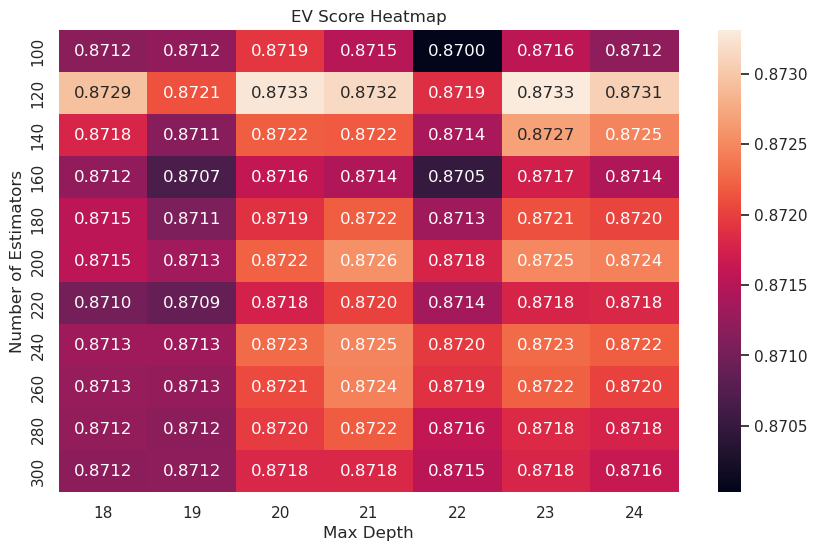

The code took 137.69 seconds to run.


In [16]:

# Record the start time
start_time = time.time()

# Initialize lists to store R2 scores and EV scores
r2_scores = []
ev_scores = []

# Define the range of max depths and number of estimators
max_depth_values = range(18, 25,1)
n_estimators_values = range(100, 301, 20)

# Create mesh grid for max depth and number of estimators
max_depth_mesh, n_estimators_mesh = np.meshgrid(max_depth_values, n_estimators_values)

# Initialize arrays to store R2 and EV scores
r2_mesh = np.zeros_like(max_depth_mesh, dtype=float)
ev_mesh = np.zeros_like(max_depth_mesh, dtype=float)

# Iterate through max_depth and n_estimators
for i in range(len(max_depth_values)):
    for j in range(len(n_estimators_values)):
        # Initialize the model with the current max depth and number of estimators
        rf_clf = RandomForestRegressor(n_estimators=n_estimators_values[j], max_depth=max_depth_values[i], random_state=42)
        rf_clf.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = rf_clf.predict(X_test)
        
        # Calculate R2 score and EV score
        r2_mesh[j, i] = r2_score(y_test, y_pred)
        ev_mesh[j, i] = explained_variance_score(y_test, y_pred)

# Create heatmap for R2 score
plt.figure(figsize=(10, 6))
sns.heatmap(r2_mesh, annot=True, fmt='.4f', xticklabels=max_depth_values, yticklabels=n_estimators_values)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('R2 Score Heatmap')
plt.show()

# Create heatmap for EV score
plt.figure(figsize=(10, 6))
sns.heatmap(ev_mesh, annot=True, fmt='.4f', xticklabels=max_depth_values, yticklabels=n_estimators_values)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('EV Score Heatmap')
plt.show()


# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f'The code took {elapsed_time:.2f} seconds to run.')


In [ ]:
#forest classifciation

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       254
           1       0.93      0.90      0.91        77

    accuracy                           0.96       331
   macro avg       0.95      0.94      0.94       331
weighted avg       0.96      0.96      0.96       331

The code took 0.35 seconds to run.


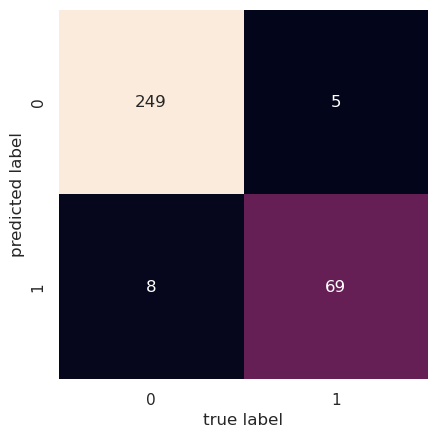

In [42]:
#forest classifier
# Record the start time
start_time = time.time()

#split data
y = data['Acceptable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators= 100 #200, 209, 600
depth_max = 10

## initialize model
rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth_max, random_state=42) #random_state=42
rf_clf.fit(X_train,y_train)

#predictions 
y_pred = rf_clf.predict(X_test)


#reports
print(metrics.classification_report(y_pred, y_test))
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f'The code took {elapsed_time:.2f} seconds to run.')

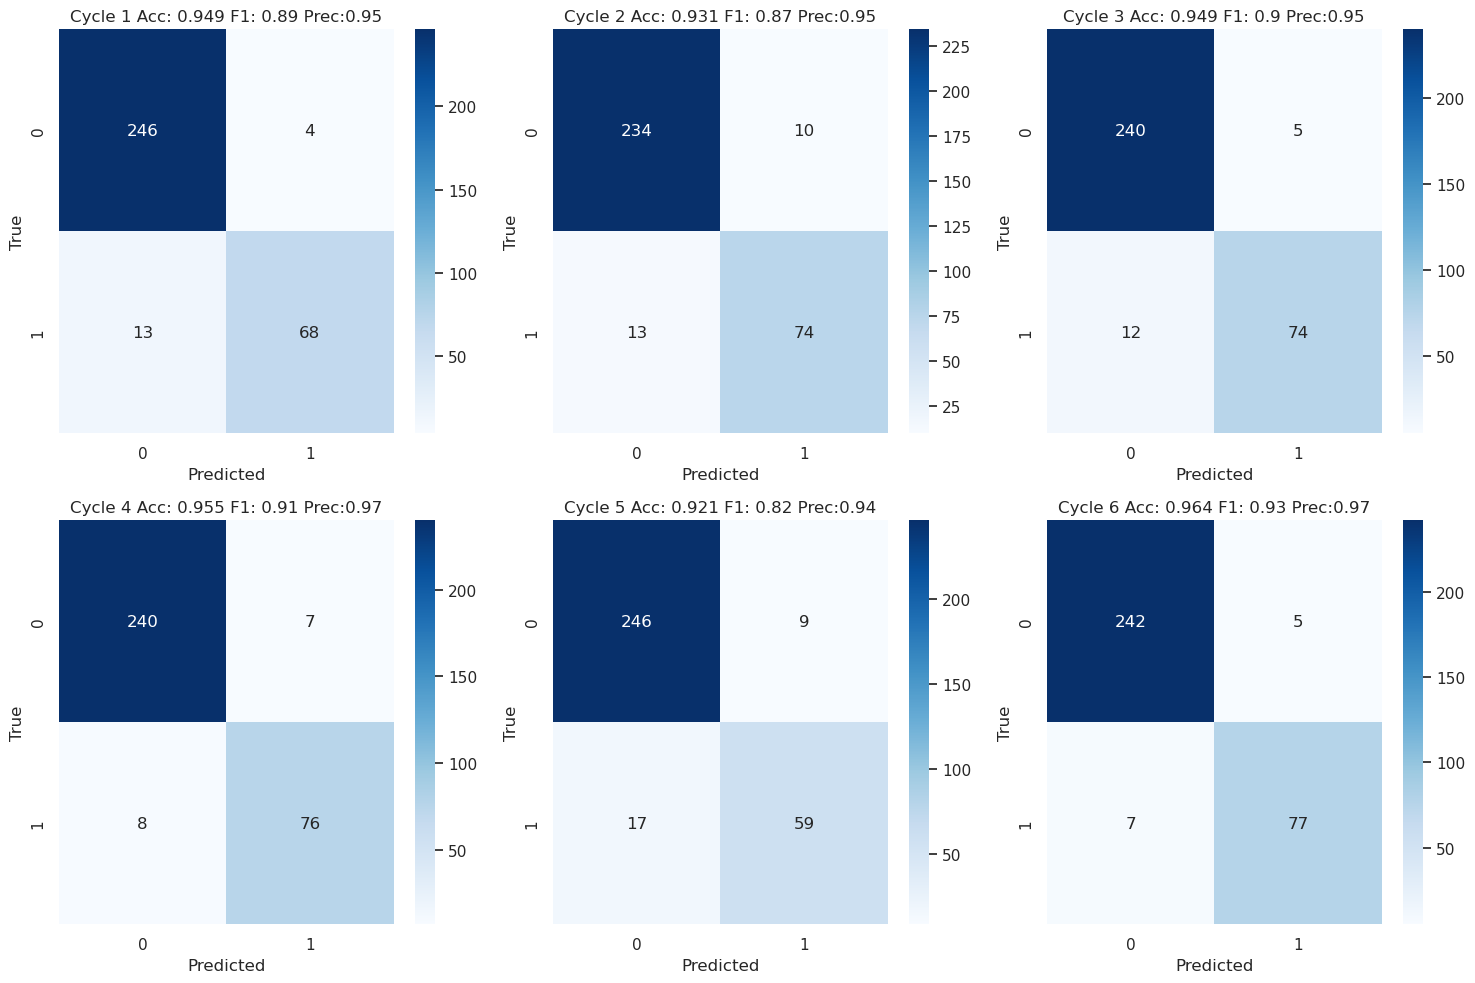

Min Accuracy: 0.921
Max Accuracy: 0.964
Min F1 Score: 0.82
Max F1 Score: 0.93
Min Precision: 0.94
Max Precision: 0.97
The code took 3.97 seconds to run.


In [43]:
#running multiple logistic regression across the randomized data to see how consistent the prediction is
# Record the start time
start_time = time.time()

# Set the number of cycles through all data for testing
num_cycles = 6  # Adjust this number as needed

# Calculate the optimal number of rows and columns for the subplots
num_plots = num_cycles
rows = int(np.sqrt(num_plots))
cols = int(np.ceil(num_plots / rows))

# Create a figure with the optimal layout
fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))

# Initialize lists to store scores
accuracy_scores = []
f1_scores = []
precision_scores = []


n_estimators= 100 #200, 209, 600
depth_max = 10

y = data['Acceptable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop for multiple linear regressions with different test sets
for cycle in range(num_cycles):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, ylog, test_size=0.2, random_state=cycle)

       ## initialize model
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth_max, random_state=42) #random_state=42
    rf_clf.fit(X_train,y_train)

    #predictions 
    y_pred = rf_clf.predict(X_test)
    
    # Evaluate the model
    accuracy = round(accuracy_score(y_test, y_pred),3)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1_score = float(report.split('\n')[3].split()[3])
    precision = float(report.split('\n')[2].split()[1])    
    
    # Append scores to the lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1_score)
    precision_scores.append(precision)
    
    # Display confusion matrix
    ax = axs[int(cycle / cols), cycle % cols]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Cycle {cycle + 1} Acc: {accuracy} F1: {f1_score} Prec:{precision}')


# Hide any empty subplots
for i in range(num_plots, rows * cols):
    axs[int(i / cols), i % cols].axis('off')

plt.tight_layout()
plt.show()

# Print min and max scores
print("Min Accuracy:", min(accuracy_scores))
print("Max Accuracy:", max(accuracy_scores))
print("Min F1 Score:", min(f1_scores))
print("Max F1 Score:", max(f1_scores))
print("Min Precision:", min(precision_scores))
print("Max Precision:", max(precision_scores))

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the elapsed time
print(f'The code took {elapsed_time:.2f} seconds to run.')


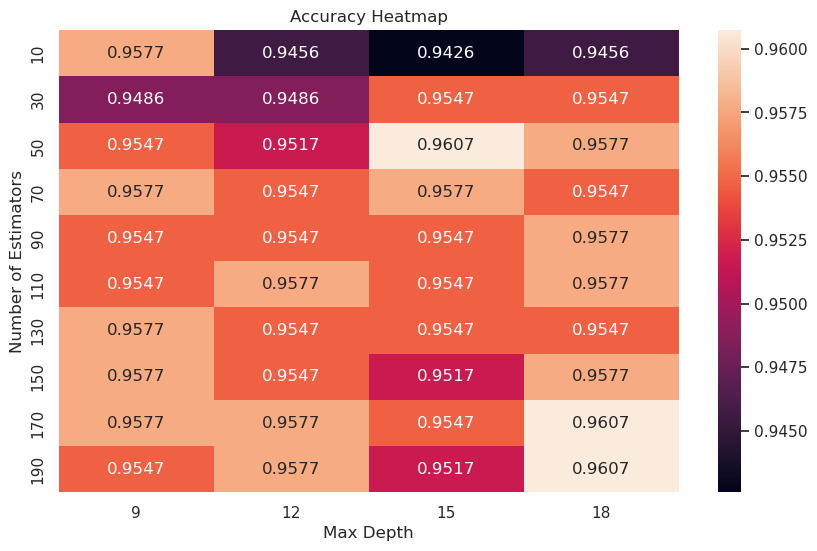

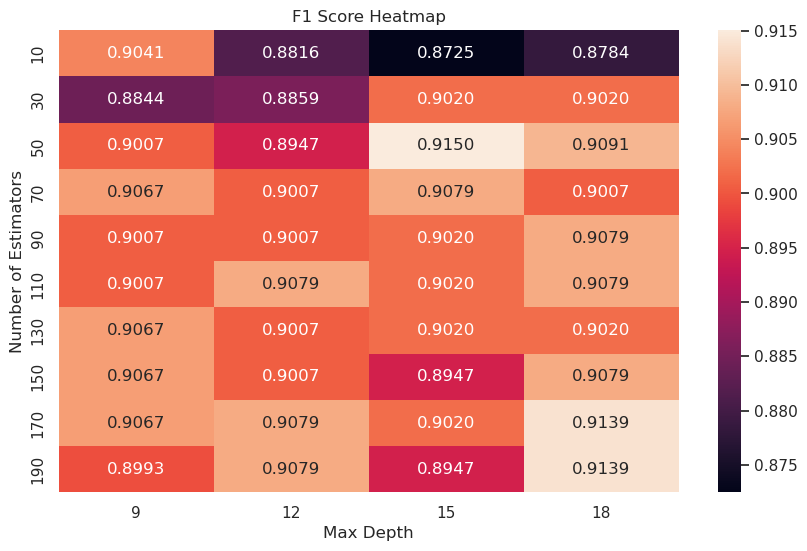

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Split data
y = data['Acceptable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracy and f1 scores
accuracy_scores = []
f1_scores = []

# Vary the number of estimators and max depth
n_estimators_values = range(10, 201, 20)
max_depth_values = range(9, 19, 3)

# Initialize an empty matrix to store the scores
accuracy_matrix = np.zeros((len(n_estimators_values), len(max_depth_values)))
f1_matrix = np.zeros((len(n_estimators_values), len(max_depth_values)))

# Loop over n_estimators and max_depth
for i, n_estimators in enumerate(n_estimators_values):
    for j, max_depth in enumerate(max_depth_values):
        # Initialize the model
        rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_clf.fit(X_train, y_train)
        
        # Predict using the model
        y_pred = rf_clf.predict(X_test)
        
        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Store the scores in the matrices
        accuracy_matrix[i, j] = accuracy
        f1_matrix[i, j] = f1

# Plot the heatmap for accuracy
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, fmt='.4f', xticklabels=max_depth_values, yticklabels=n_estimators_values)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('Accuracy Heatmap')
plt.show()

# Plot the heatmap for F1 score
plt.figure(figsize=(10, 6))
sns.heatmap(f1_matrix, annot=True, fmt='.4f', xticklabels=max_depth_values, yticklabels=n_estimators_values)
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.title('F1 Score Heatmap')
plt.show()
